In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
# pd.set_option('max_columns', 200)

In [99]:
df = pd.read_csv("Car_Insurance_Claim.csv")

## Step 1: Data Cleaning
* Impute missing values
* Drop duplicate rows

In [100]:
df.head()

,Unnamed: 0,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0


The only unnecesary columns we have here is the first column which is duplicating the defolt pandas indices and the ID column which is not helpfull here at all. We dont need two same columns so we just drop it

In [101]:
df = df.drop(df.columns[[0, 1]], axis= 1)
df

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.5827870696562382,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,26-39,female,majority,10-19y,none,middle class,0.5222314755016938,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,26-39,male,majority,0-9y,high school,middle class,0.4709402314479679,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,26-39,female,majority,10-19y,high school,poverty,0.3641847847297929,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [102]:
# we will save it for later
missing_credit_score= df.loc[df["CREDIT_SCORE"].isna()]

In [103]:
df.isna().sum()

AGE                      50
GENDER                   50
RACE                     49
DRIVING_EXPERIENCE       50
EDUCATION                49
INCOME                    0
CREDIT_SCORE           1022
VEHICLE_OWNERSHIP        50
VEHICLE_YEAR             50
MARRIED                  48
CHILDREN                 50
POSTAL_CODE              50
ANNUAL_MILEAGE         1000
VEHICLE_TYPE             49
SPEEDING_VIOLATIONS      50
DUIS                     50
PAST_ACCIDENTS           50
OUTCOME                  50
dtype: int64

In [104]:
df = df.replace('none', np.NaN)
df.dropna(subset=['OUTCOME'], inplace=True)


input_mean_columns = ["CREDIT_SCORE", "ANNUAL_MILEAGE"]
input_0_columns = ["DUIS", "PAST_ACCIDENTS", "SPEEDING_VIOLATIONS"]
input_moda_columns = ["EDUCATION", "AGE", "GENDER", "RACE","POSTAL_CODE", "DRIVING_EXPERIENCE", "VEHICLE_OWNERSHIP", "VEHICLE_YEAR", "MARRIED", "CHILDREN", 
                     "VEHICLE_TYPE"]



df[input_0_columns] = df[input_0_columns].fillna(0).astype(int)
df[input_mean_columns] = df[input_mean_columns].astype(float)
df[input_mean_columns] = df[input_mean_columns].fillna(df[input_mean_columns].mean())
df[input_moda_columns] = df[input_moda_columns].apply(lambda col: col.fillna(col.mode()[0]))


df["OUTCOME"] = df["OUTCOME"].astype(float)
df["VEHICLE_OWNERSHIP"] = df["VEHICLE_OWNERSHIP"].astype(float)

df.isna().sum()



AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [105]:
#Drop duplicate rows
df.loc[~df.duplicated()]
df  = df.loc[~df.duplicated()]

## Step 2: Descriptive Statistics

In [106]:
df["VIOLATION_HISTORY"] = df['PAST_ACCIDENTS'] + df['SPEEDING_VIOLATIONS'] + df['DUIS']
df["REGION"] = df["POSTAL_CODE"].str[:3]

In [107]:
#There is no point to use this function but i will leave it here so u can see why
df.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,VIOLATION_HISTORY
count,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000,9878.000000
mean,0.515663,0.701559,11700.042654,1.467504,0.236688,1.049200,0.312513,2.753391
std,0.130222,0.457597,2668.986301,2.233125,0.552464,1.651103,0.463541,3.547152
min,0.053358,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.431951,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.515663,1.000000,11704.368439,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.606735,1.000000,13000.000000,2.000000,0.000000,2.000000,1.000000,4.000000
max,0.960819,1.000000,22000.000000,22.000000,6.000000,15.000000,1.000000,28.000000


In [118]:
df_corr = df.dropna().corr()
df_corr

,CREDIT_SCORE,VEHICLE_OWNERSHIP,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,VIOLATION_HISTORY
CREDIT_SCORE,1.000000,0.292169,-0.157974,0.194579,0.120314,0.173872,-0.309531,0.222170
VEHICLE_OWNERSHIP,0.292169,1.000000,-0.090261,0.132389,0.086006,0.118331,-0.375031,0.151821
ANNUAL_MILEAGE,-0.157974,-0.090261,1.000000,-0.306132,-0.109861,-0.186807,0.177344,-0.296791
SPEEDING_VIOLATIONS,0.194579,0.132389,-0.306132,1.000000,0.352057,0.438408,-0.289040,0.888454
DUIS,0.120314,0.086006,-0.109861,0.352057,1.000000,0.253505,-0.186864,0.495387
PAST_ACCIDENTS,0.173872,0.118331,-0.186807,0.438408,0.253505,1.000000,-0.309400,0.780957
OUTCOME,-0.309531,-0.375031,0.177344,-0.289040,-0.186864,-0.309400,1.000000,-0.355088
VIOLATION_HISTORY,0.222170,0.151821,-0.296791,0.888454,0.495387,0.780957,-0.355088,1.000000


## 3 Visualization, Feature Relationships:
* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby Comparisons

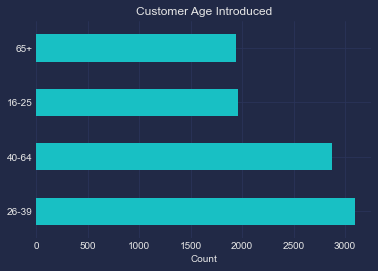

In [108]:
ax = df["AGE"].value_counts().plot(kind="barh", title="Customer Age Introduced")
ax = ax.set_xlabel("Count")


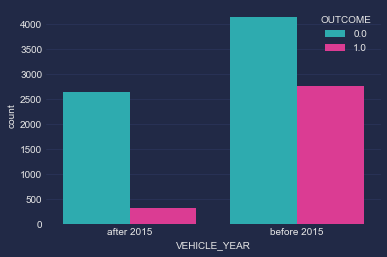

In [109]:
ax = sns.countplot(data=df, x="VEHICLE_YEAR", hue="OUTCOME")

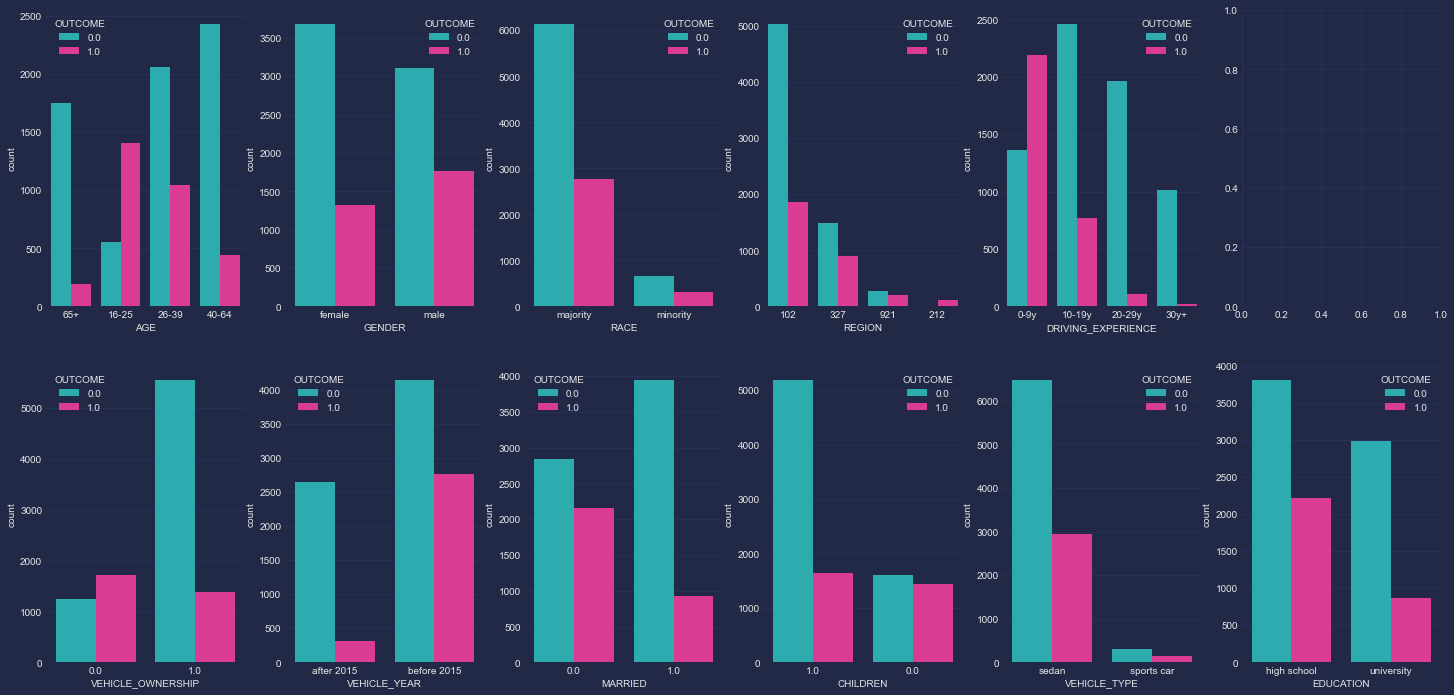

In [110]:
fig, axes = plt.subplots(2,6, figsize=(25, 12))


ax = sns.countplot(ax = axes [0][0], data = df, x = "AGE", hue = "OUTCOME")
ax = sns.countplot(ax = axes [0][1], data = df, x = "GENDER", hue = "OUTCOME")
ax = sns.countplot(ax = axes [0][2], data = df, x = "RACE", hue = "OUTCOME")
ax = sns.countplot(ax = axes [0][3], data = df, x = "REGION", hue = "OUTCOME")
ax = sns.countplot(ax = axes [0][4], data = df, x = "DRIVING_EXPERIENCE", hue = "OUTCOME")
ax = sns.countplot(ax = axes [1][0], data = df, x = "VEHICLE_OWNERSHIP", hue = "OUTCOME")
ax = sns.countplot(ax = axes [1][1], data = df, x = "VEHICLE_YEAR", hue = "OUTCOME")
ax = sns.countplot(ax = axes [1][2], data = df, x = "MARRIED", hue = "OUTCOME")
ax = sns.countplot(ax = axes [1][3], data = df, x = "CHILDREN", hue = "OUTCOME")
ax = sns.countplot(ax = axes [1][4], data = df, x = "VEHICLE_TYPE", hue = "OUTCOME")
ax = sns.countplot(ax = axes [1][5], data = df, x = "EDUCATION", hue = "OUTCOME")


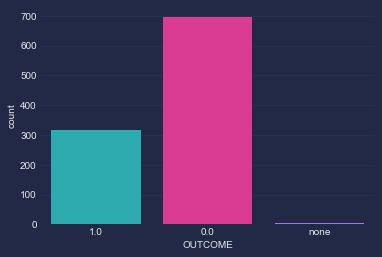

In [111]:
ax = sns.countplot(data = missing_credit_score, x = "OUTCOME")

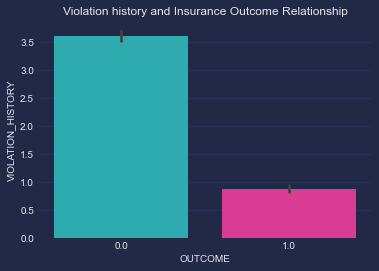

In [112]:
ax = sns.barplot( data = df, x = "OUTCOME", y= "VIOLATION_HISTORY",)
ax = ax.set_title("Violation history and Insurance Outcome Relationship")

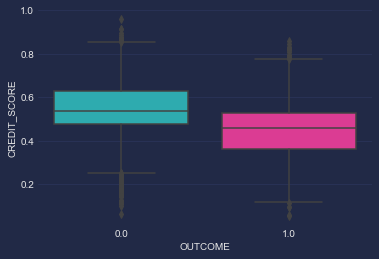

In [113]:
ax = sns.boxplot(x="OUTCOME", y="CREDIT_SCORE", data=df)

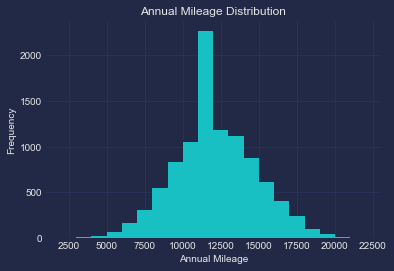

In [114]:

ax = df["ANNUAL_MILEAGE"].plot(kind = "hist", bins = 20, title = "Annual Mileage Distribution")
ax = ax.set_xlabel("Annual Mileage")




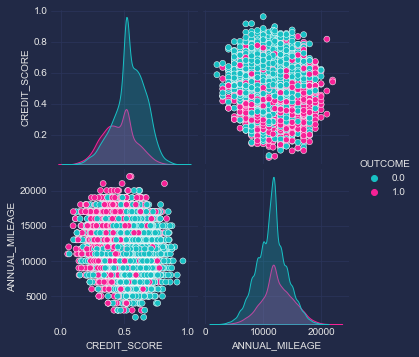

In [115]:
ax = sns.pairplot(df, vars = ["CREDIT_SCORE", "ANNUAL_MILEAGE"], hue = "OUTCOME" )

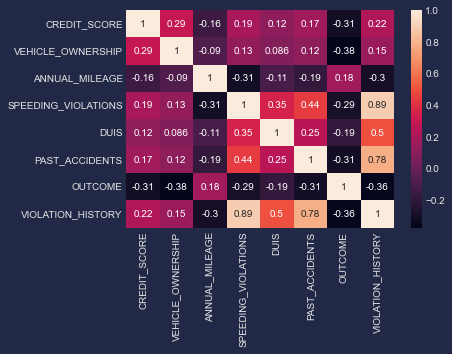

In [116]:
df_corr = df.dropna().corr()
ax = sns.heatmap(df_corr, annot = True)

## Step 4: Conclusions
From the visualization we made before we can clearly see some relationships between the features, below provided plots that shows it.

* Customers whose Violation history was high did not receive insurance
* Customers with no credit score mostly did not receive insurance

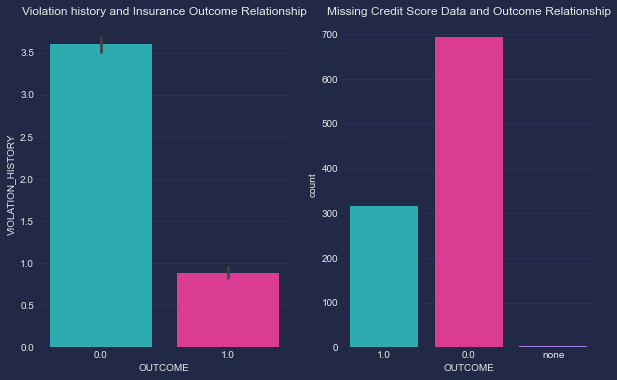

In [117]:
fig, axes = plt.subplots(1,2, figsize=(10, 6))
ax = sns.barplot( ax = axes[0], data = df, x = "OUTCOME", y= "VIOLATION_HISTORY",)
ax = ax.set_title("Violation history and Insurance Outcome Relationship")
ax = sns.countplot(ax = axes[1], data = missing_credit_score, x = "OUTCOME")
ax = ax.set_title("Missing Credit Score Data and Outcome Relationship")